In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_global = pd.read_parquet('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/df_final_15min_NoNan_20250505.parquet')

In [4]:
df_prediction_taux_occupation = pd.read_csv('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/donnees_predictions/taux_occupation_predictions.csv')

In [5]:
df_global['etat_binaire'] = df_global['etat_du_trafic'].apply(
    lambda x: 'Fluide' if x == 'Fluide' else 'Non-Fluide'
)

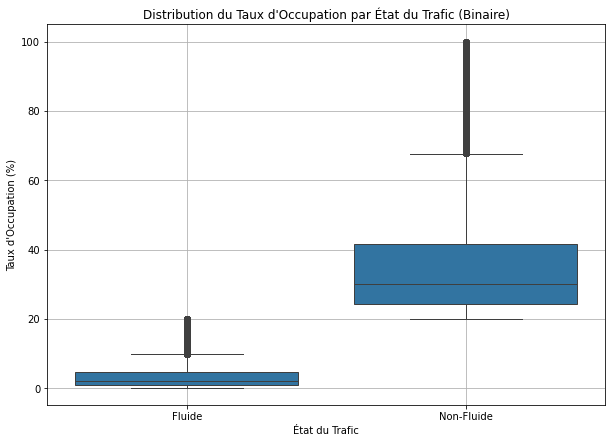

In [6]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='etat_binaire', y='taux_occupation', data=df_global, 
            order=['Fluide', 'Non-Fluide'])

plt.title("Distribution du Taux d'Occupation par État du Trafic (Binaire)")
plt.xlabel("État du Trafic")
plt.ylabel("Taux d'Occupation (%)")
plt.grid(True)
plt.show()

In [7]:
summary_stats = df_global.groupby('etat_binaire')['taux_occupation'].describe()

print("--- Valeurs Numériques des Boxplots ---")
print(summary_stats)

--- Valeurs Numériques des Boxplots ---
                  count       mean        std    min        25%    50%    75%  \
etat_binaire                                                                    
Fluide        1836582.0   3.443077   3.410669   0.20   1.015385   2.05   4.55   
Non-Fluide      44157.0  34.825022  14.511421  19.95  24.150000  30.00  41.60   

                  max  
etat_binaire           
Fluide         19.975  
Non-Fluide    100.000  


In [8]:
df_prediction_taux_occupation['etat_trafic_predit'] = df_prediction_taux_occupation['taux_occupation_pred'].apply(
    lambda x: 'Fluide' if x < 14.5 else 'Non-Fluide'
)

In [9]:
df_global['heure_arrondie'] = pd.to_datetime(df_global['heure_arrondie'])
df_prediction_taux_occupation['heure_arrondie'] = pd.to_datetime(df_prediction_taux_occupation['heure_arrondie'])

df_eval = pd.merge(
    df_prediction_taux_occupation,
    df_global,
    on=['heure_arrondie', 'nom_du_troncon']
)

In [10]:
y_pred = df_eval['etat_trafic_predit']
y_true = df_eval['etat_binaire']
target_names = ['Fluide (0)', 'Non Fluide (1)']
print(classification_report(y_true, y_pred, target_names=target_names))

                precision    recall  f1-score   support

    Fluide (0)       0.99      0.98      0.98    422099
Non Fluide (1)       0.36      0.53      0.43      9325

      accuracy                           0.97    431424
     macro avg       0.67      0.76      0.71    431424
  weighted avg       0.98      0.97      0.97    431424




--- Matrice de Confusion (Modèle par Seuils Binaire) ---


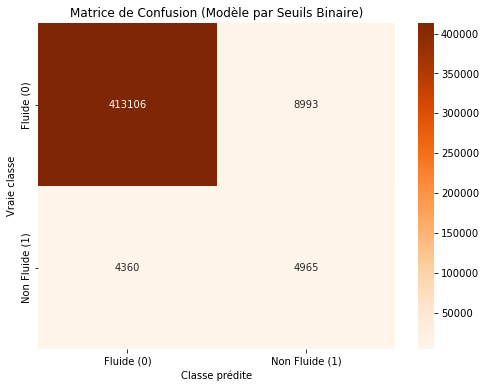

In [11]:
print("\n--- Matrice de Confusion (Modèle par Seuils Binaire) ---")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.title('Matrice de Confusion (Modèle par Seuils Binaire)')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()